# Chapter 2. The Mathematical Building Blocks of Neural Networks

## 2.2. Data Represenations for Neural Networks

**Note**: Multi-dimentional numpy arrays are called tensor. Its a container for data. For example, matrix is a rank-2 tensors.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Scalar (Rank-0 tensors)

In [2]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


### Vector (Rank-1 tensors)

In [3]:
x = np.array([1,2,3,4])
print(x)
print(x.ndim)

[1 2 3 4]
1


### Matrices (Rank-2 tensors)

In [4]:
x = np.array([
    [1,2,3,4],
    [5,6,7,8],
])
print(x)
print(x.ndim)

[[1 2 3 4]
 [5 6 7 8]]
2


### Analyse MNIST Dataset

In [5]:
# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [6]:
# check dimension, shape, datatype
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


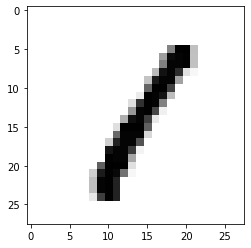

In [7]:
# show the image
digit = train_images[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

In [8]:
# collect a group of image
my_slice = train_images[10:100]
print(my_slice.shape)

# similar represenation
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

# similar representation
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


### The notion of data batches
**Note**: the first axis is called batch dimension or batch axis

In [9]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
print(batch.shape)

(128, 28, 28)


### Other types of data tensors
- Vector data is a Rank-2 tensor. Ex: (samples, features).
- Timeseries data or sequence data is a Rank-3 tensor. Ex: (samples, timesteps, features).
- Images is a Rank-4 tensor. Ex: (samples, height, width, channels).
- Video is a Rank-5 tensor. Ex: (samples, frames, height, width, channels).

### Tensor Operators

This is how activation function works

```python
# keras
keras.layers.Dense(512, activation="relu")

# math
output = relu(dot(input, W) + b)

# python
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x
```

### Broadcasting

In [10]:
X = np.random.random((32, 10))
y = np.random.random((10,))
print(x.shape)
print(y.shape)

(2, 4)
(10,)


In [11]:
y = np.expand_dims(y, axis=0)
print(y.shape)

(1, 10)


In [12]:
Y = np.concatenate([y] * 32, axis=0) 
print(Y.shape)

(32, 10)


### So what is Deep Learning?
- Uncrumpling a paper balls: finding neat represenations for complex, highly folded data manifods in high-dim spaces.
- Deep Learning is good as it takes the approach to incrementally decomposing a complicated geometric transformation into a long chain of elementary ones.

### Engine of Neural Networks: Gradient-based Optimization
- Derivative of a tensor operation is called gradient.
- Momentum addresses two issues with SGD: convergence speed and local minima. The optimization process could get stuck at the local minimum instead of making its way to the global minimum

### Chaining Derivatives: The Backpropagation Algorithm
- The chain rule: ```grad(y, x) == grad(y, x1) * grad(x1, x)```.
- Computation graph is successful as it treat computation as data. This means that you could distributed any computation without having to write a distribution logic yourself.
- Backpropagation is simply the application of the chain rule to a computation graph.
- Automatic differentiation in TF implement the computation graph so we don't have to implement backprop ourselves.